In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("..\\..\\isttc\\scripts"))
from cfg_global import isttc_results_folder_path

### Load data

In [2]:
results_folder = isttc_results_folder_path + 'synthetic_data\\tau100ms_rec5000ms\\'
dataset_folder = isttc_results_folder_path + 'synthetic_data\\dataset\\'

In [3]:
raw_data = np.load(dataset_folder + 'spike_train_tau100ms_500trials_5000ms.npy')

tau_pears_df = pd.read_pickle(results_folder + 'tau_pears_df.pkl')
tau_isttc_df = pd.read_pickle(results_folder + 'tau_isttc_df.pkl')

In [4]:
# firing rates
fr = np.sum(raw_data, axis=1) / 5
fr

tau_pears_df['fr'] = fr
tau_isttc_df['fr'] = fr

In [5]:
tau_pears_df_non_neg_1000 = tau_pears_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()
tau_isttc_df_non_neg_1000 = tau_isttc_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()

In [20]:
acf_pearson = np.load(results_folder + 'acf_pearson_l.npy')
acf_isttc = np.load(results_folder + 'acf_isttc_l.npy')

### Plots

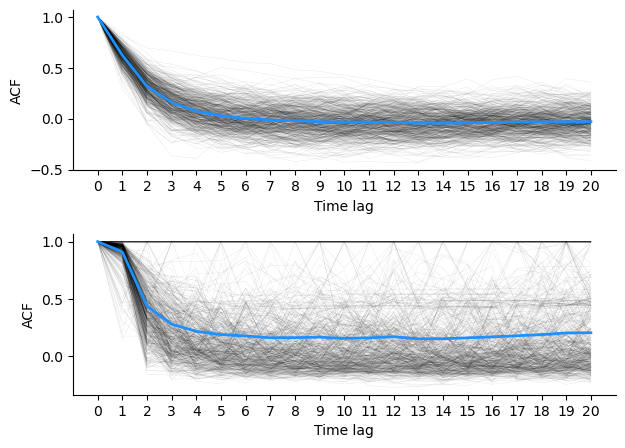

In [22]:
fig, axes = plt.subplots(2,1, figsize=(7,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

t_axis = np.linspace(0, 20, acf_pearson.shape[1])

avg_acf_pearson = np.mean(acf_pearson, axis=0)
avg_acf_isttc = np.mean(acf_isttc, axis=0)

for ii in range(acf_pearson.shape[0]):
    axes[0].plot(t_axis, acf_pearson[ii], c='k', lw=0.3, alpha=0.1)
axes[0].plot(t_axis, avg_acf_pearson, c='dodgerblue', lw=2, alpha=1)


for ii in range(acf_isttc.shape[0]):
    axes[1].plot(t_axis, acf_isttc[ii], c='k', lw=0.3, alpha=0.1)
axes[1].plot(t_axis, avg_acf_isttc, c='dodgerblue', lw=2, alpha=1)


for ax in axes.flat:
    ax.set_xlabel('Time lag')
    ax.set_ylabel('ACF')
    ax.set_xticks(t_axis)

sns.despine()

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df_non_neg_1000['tau_ms'].values)
tau_med = np.median(tau_pears_df_non_neg_1000['tau_ms'].values)
sns.histplot(ax=axes[0], x=tau_pears_df_non_neg_1000['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df_non_neg_1000['tau_ms'].values)
tau_med = np.median(tau_isttc_df_non_neg_1000['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df_non_neg_1000['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('500 samples x 5000 ms, 0 <= tau_ms <= 1000')

for ax in axes.flat:
    ax.legend(frameon=False)
sns.despine()

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(5,5))

sns.regplot(x='fr', y='tau_ms', data=tau_isttc_df_non_neg_1000)
axes.set_yscale('log')
axes.set_xscale('log')

sns.despine()

In [ ]:
tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=250)
tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=250)

fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[0], x=tau_pears_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('250 random samples x 5000 ms, 0 <= tau_ms <= 1000')

for ax in axes.flat:
    ax.legend(frameon=False)
sns.despine()

In [ ]:
n_samples = 250
pears_50_mean_l = []
isttc_50_mean_l = []
pears_50_med_l = []
isttc_50_med_l = []
for i in range(n_samples):
    tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=50)
    tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=50)
    pears_50_mean_l.append(np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    pears_50_med_l.append(np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_mean_l.append(np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_med_l.append(np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))

In [ ]:
print(pears_50_mean_l)
print(isttc_50_mean_l)

In [ ]:
pear_df = pd.DataFrame(np.vstack((pears_50_mean_l, pears_50_med_l)).T, columns=('mean', 'median'))
isttc_df = pd.DataFrame(np.vstack((isttc_50_mean_l, isttc_50_med_l)).T, columns=('mean', 'median'))
pear_df['metric'] = 'pearson'
isttc_df['metric'] = 'isttc'
combined_df = pd.concat([pear_df, isttc_df])
combined_df

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(6,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='metric', y='mean', data=combined_df, cut=0,  density_norm='width') 
sns.violinplot(ax=axes[1], x='metric', y='median', data=combined_df, cut=0,  density_norm='width') 

sns.despine()